In [1]:
setwd('/Users/cchiang/research/sunyaev/projects/epi/expts/model_calibration_2021-02-03')
date()

[1] "Wed Feb  3 10:41:50 2021"

# Model Calibration

```bash
./model_cal.sh
# usage: ./model_cal.sh OPTIONS
#
# OPTIONS:
#     -h      Show this message
#     -N	    effective population size
#     -g	    number of generations to run simulation for
#     -c	    chromosome size (bp)
#     -s 	    variant 1 selection coeff (0 is neutral)
#     -u      mutation rate
#     -r	    recombination rate
#     -o	    output prefix
#     -v      Verbose (boolean)

```

Using `emeraLD` to rapidly calculate LD statistics (https://github.com/statgen/emeraLD)

## R1

```bash
pwd
# /Users/cchiang/research/sunyaev/projects/epi/expts/model_calibration_2021-02-03/r1

for SELECTION in 0 -1e-6 -1e-5 -1e-4 -5e-4 -1e-3 -5e-3 -1e-2 -5e-2 -1e-1
do
    echo "Selection: $SELECTION"
    for i in {1..10}
    do
        OUTPREFIX=s${SELECTION}_i${i}
        time ./model_cal.sh -N 5000 -g 20000 -c 100000 -s ${SELECTION} -u 1e-8 -r 0 -o ${OUTPREFIX}
        cat ${OUTPREFIX}.vcf | vawk --header '{ $3=I$MID ; print }' | bgzip -c > ${OUTPREFIX}.vcf.gz &&
        rm ${OUTPREFIX}.vcf
        tabix -p vcf ${OUTPREFIX}.vcf.gz;

        emeraLD --in ${OUTPREFIX}.vcf.gz --stdout --phased --extra --dstats | gzip -c > ${OUTPREFIX}.ld.txt.gz
    done
done
 ```

```bash
for SELECTION in 0 -1e-6 -1e-5 -1e-4 -5e-4 -1e-3 -5e-3 -1e-2 -5e-2 -1e-1
do
    for i in {1..10}
    do
        OUTPREFIX=s${SELECTION}_i${i}

        if [ -f "${OUTPREFIX}.ld.txt.gz" ]
        then
            zcat ${OUTPREFIX}.ld.txt.gz | grep -v "^#" | cut -f 10 | zstats > stats.txt
            NLINES=`cat stats.txt | grep "num lines" | awk '{ print $NF}'`
            MEAN=`cat stats.txt | grep arith | awk '{ print $NF}'`
            STDEV=`cat stats.txt | grep stdev | awk '{ print $NF}'`
            echo -e "${SELECTION}\t${i}\t${NLINES}\t${MEAN}\t${STDEV}"
        fi
    done
done > summary_stats.txt
```

### R session

In [101]:
setwd('/Users/cchiang/research/sunyaev/projects/epi/expts/model_calibration_2021-02-03/r1')

In [102]:
library('ggplot2')
library('ggthemes')
options(repr.plot.width=12, repr.plot.height=8)

In [103]:
dat <- read.table('summary_stats.txt', col.names=c('s', 'run', 'num_variants', 'D_mean', 'D_stdev'))
dat$s <- as.factor(dat$s)
dat$s <- factor(dat$s, levels=rev(levels(dat$s)))

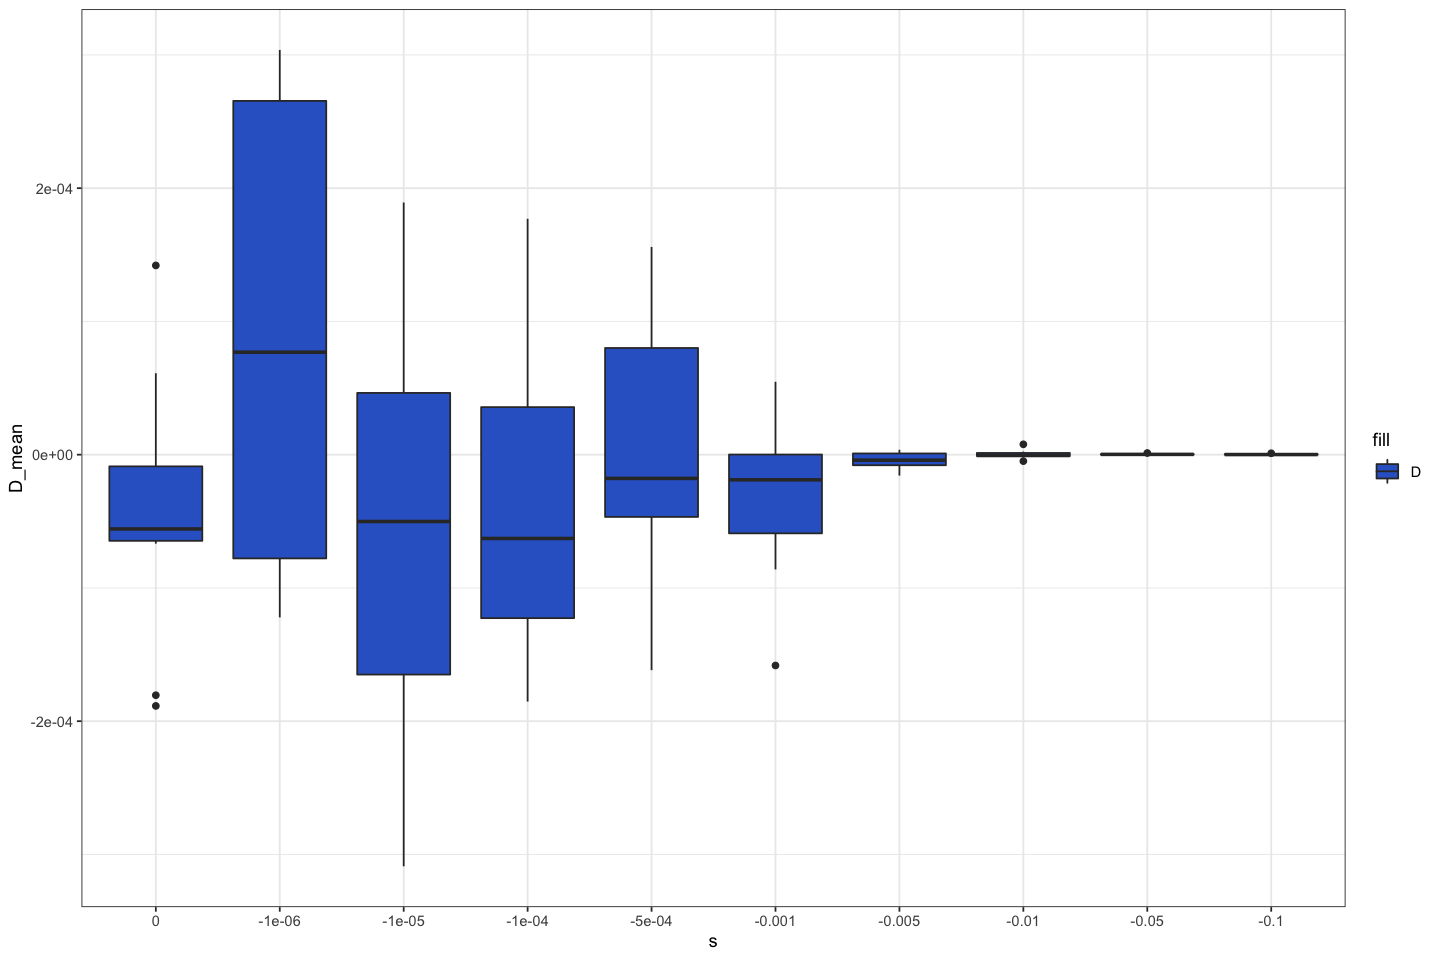

In [104]:
p <- ggplot(dat, aes(x=s, y=D_mean)) + theme_bw() + scale_fill_gdocs()
p <- p + geom_boxplot(aes(fill='D'))
p

## R2

```bash
pwd
# /Users/cchiang/research/sunyaev/projects/epi/expts/model_calibration_2021-02-03/r2

for SELECTION in 0 -1e-6 -1e-5 -1e-4 -5e-4 -1e-3 -5e-3 -1e-2 -5e-2 -1e-1
do
    echo "Selection: $SELECTION"
    for i in {1..10}
    do
        OUTPREFIX=s${SELECTION}_i${i}
        time ./model_cal.sh -N 2000 -g 20000 -c 100000 -s ${SELECTION} -u 1e-8 -r 0 -o ${OUTPREFIX}
        cat ${OUTPREFIX}.vcf | vawk --header '{ $3=I$MID ; print }' | bgzip -c > ${OUTPREFIX}.vcf.gz &&
        rm ${OUTPREFIX}.vcf
        tabix -p vcf ${OUTPREFIX}.vcf.gz;

        emeraLD --in ${OUTPREFIX}.vcf.gz --stdout --phased --extra --dstats | gzip -c > ${OUTPREFIX}.ld.txt.gz
    done
done
 ```

```bash
for SELECTION in 0 -1e-6 -1e-5 -1e-4 -5e-4 -1e-3 -5e-3 -1e-2 -5e-2 -1e-1
do
    for i in {1..10}
    do
        OUTPREFIX=s${SELECTION}_i${i}

        if [ -f "${OUTPREFIX}.ld.txt.gz" ]
        then
            zcat ${OUTPREFIX}.ld.txt.gz | grep -v "^#" | cut -f 10 | zstats > stats.txt
            NLINES=`cat stats.txt | grep "num lines" | awk '{ print $NF}'`
            MEAN=`cat stats.txt | grep arith | awk '{ print $NF}'`
            STDEV=`cat stats.txt | grep stdev | awk '{ print $NF}'`
            echo -e "${SELECTION}\t${i}\t${NLINES}\t${MEAN}\t${STDEV}"
        fi
    done
done > summary_stats.txt
```

### R session

In [108]:
setwd('/Users/cchiang/research/sunyaev/projects/epi/expts/model_calibration_2021-02-03/r2')

In [109]:
library('ggplot2')
library('ggthemes')
options(repr.plot.width=12, repr.plot.height=8)

In [110]:
dat <- read.table('summary_stats.txt', col.names=c('s', 'run', 'num_variants', 'D_mean', 'D_stdev'))
dat$s <- as.factor(dat$s)
dat$s <- factor(dat$s, levels=rev(levels(dat$s)))

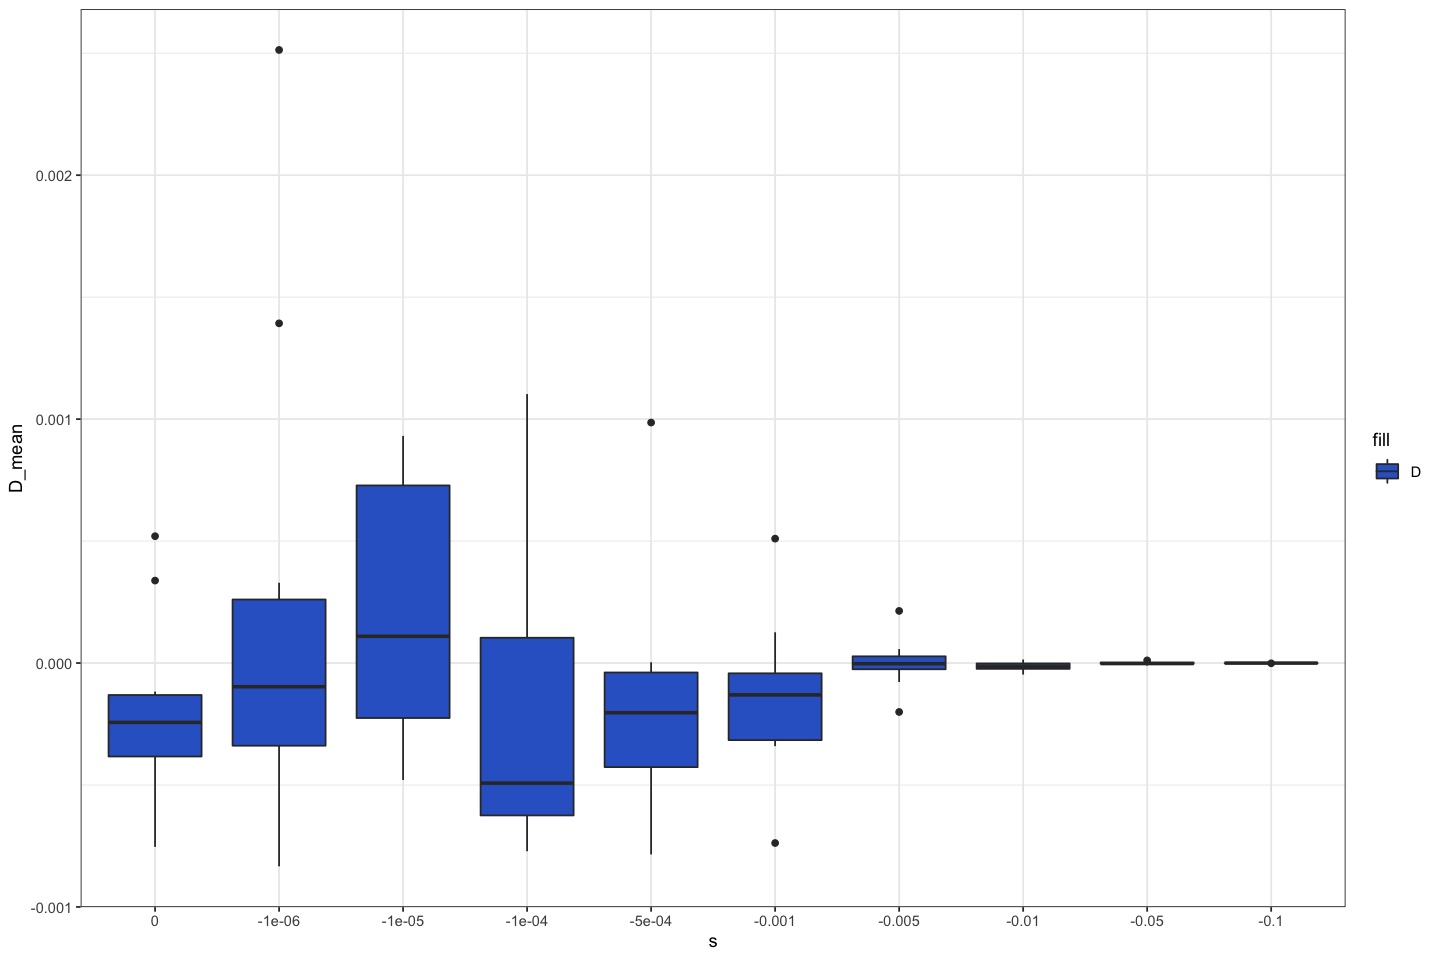

In [111]:
p <- ggplot(dat, aes(x=s, y=D_mean)) + theme_bw() + scale_fill_gdocs()
p <- p + geom_boxplot(aes(fill='D'))
p

## R3

```bash
pwd
# /Users/cchiang/research/sunyaev/projects/epi/expts/model_calibration_2021-02-03/r3

for SELECTION in 0 -1e-6 -1e-5 -1e-4 -5e-4 -1e-3 -5e-3 -1e-2 -5e-2 -1e-1
do
    echo "Selection: $SELECTION"
    for i in {1..10}
    do
        OUTPREFIX=s${SELECTION}_i${i}
        time ./model_cal.sh -N 2000 -g 20000 -c 100000 -s ${SELECTION} -u 1e-9 -r 0 -o ${OUTPREFIX}
        cat ${OUTPREFIX}.vcf | vawk --header '{ $3=I$MID ; print }' | bgzip -c > ${OUTPREFIX}.vcf.gz &&
        rm ${OUTPREFIX}.vcf
        tabix -p vcf ${OUTPREFIX}.vcf.gz;

        emeraLD --in ${OUTPREFIX}.vcf.gz --stdout --phased --extra --dstats | gzip -c > ${OUTPREFIX}.ld.txt.gz
    done
done
 ```

```bash
for SELECTION in 0 -1e-6 -1e-5 -1e-4 -5e-4 -1e-3 -5e-3 -1e-2 -5e-2 -1e-1
do
    for i in {1..10}
    do
        OUTPREFIX=s${SELECTION}_i${i}

        if [ -f "${OUTPREFIX}.ld.txt.gz" ]
        then
            if [ `zcat "${OUTPREFIX}.ld.txt.gz" | grep -v "^#" | wc -l` -gt 1 ]
            then
                zcat ${OUTPREFIX}.ld.txt.gz | grep -v "^#" | cut -f 10 | zstats > stats.txt
                NLINES=`cat stats.txt | grep "num lines" | awk '{ print $NF}'`
                MEAN=`cat stats.txt | grep arith | awk '{ print $NF}'`
                STDEV=`cat stats.txt | grep stdev | awk '{ print $NF}'`
                echo -e "${SELECTION}\t${i}\t${NLINES}\t${MEAN}\t${STDEV}"
            fi
        fi
    done
done > summary_stats.txt
```

### R session

In [112]:
setwd('/Users/cchiang/research/sunyaev/projects/epi/expts/model_calibration_2021-02-03/r3')

In [113]:
library('ggplot2')
library('ggthemes')
options(repr.plot.width=12, repr.plot.height=8)

In [114]:
dat <- read.table('summary_stats.txt', col.names=c('s', 'run', 'num_variants', 'D_mean', 'D_stdev'))
dat$s <- as.factor(dat$s)
dat$s <- factor(dat$s, levels=rev(levels(dat$s)))

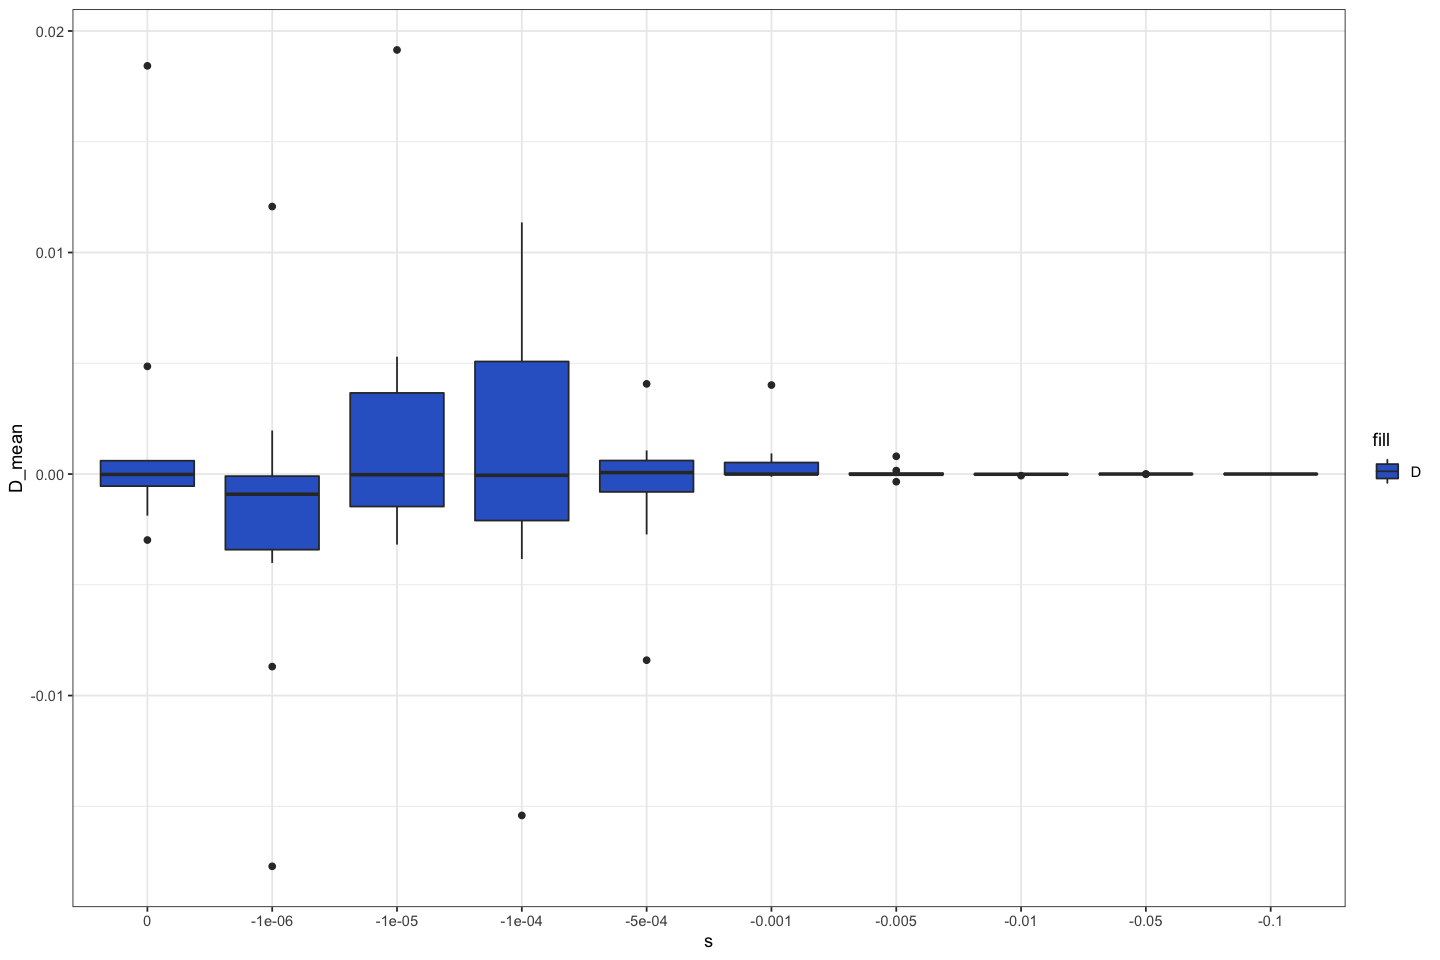

In [115]:
p <- ggplot(dat, aes(x=s, y=D_mean)) + theme_bw() + scale_fill_gdocs()
p <- p + geom_boxplot(aes(fill='D'))
p

## R4

Run the simulation

```bash
pwd
# /Users/cchiang/research/sunyaev/projects/epi/expts/model_calibration_2021-02-03/r4

for SELECTION in 0 -1e-7 -1e-6 -1e-5 -1e-4 -5e-4 -1e-3 -5e-3 -1e-2 -5e-2 -1e-1
do
    echo "Selection: $SELECTION"
    for i in {1..50}
    do
        OUTPREFIX=s${SELECTION}_i${i}
        time ./model_cal.sh -N 5000 -g 20000 -c 100000 -s ${SELECTION} -u 1e-8 -r 0 -o ${OUTPREFIX}
        cat ${OUTPREFIX}.vcf | vawk --header '{ $3=I$MID ; print }' | bgzip -c > ${OUTPREFIX}.vcf.gz &&
        rm ${OUTPREFIX}.vcf
        tabix -p vcf ${OUTPREFIX}.vcf.gz;

        emeraLD --in ${OUTPREFIX}.vcf.gz --stdout --phased --extra --dstats | gzip -c > ${OUTPREFIX}.ld.txt.gz
    done
done
 ```

Compile summary statistics

```bash
for SELECTION in 0 -1e-7 -1e-6 -1e-5 -1e-4 -5e-4 -1e-3 -5e-3 -1e-2 -5e-2 -1e-1
do
    for i in {1..50}
    do
        OUTPREFIX=s${SELECTION}_i${i}

        if [ -f "${OUTPREFIX}.ld.txt.gz" ]
        then
            zcat ${OUTPREFIX}.ld.txt.gz | grep -v "^#" | cut -f 10 | zstats > stats.txt
            NLINES=`cat stats.txt | grep "num lines" | awk '{ print $NF}'`
            MEAN=`cat stats.txt | grep arith | awk '{ print $NF}'`
            STDEV=`cat stats.txt | grep stdev | awk '{ print $NF}'`
            echo -e "${SELECTION}\t${i}\t${NLINES}\t${MEAN}\t${STDEV}"
        fi
    done
done > summary_stats.txt
```

### R session

In [1]:
setwd('/Users/cchiang/research/sunyaev/projects/epi/expts/model_calibration_2021-02-03/r4')

In [2]:
library('ggplot2')
library('ggthemes')
options(repr.plot.width=12, repr.plot.height=8)

In [53]:
dat <- read.table('summary_stats.txt', col.names=c('s', 'run', 'num_variants', 'D_mean', 'D_stdev'))
dat$s <- as.factor(dat$s)
dat$s <- factor(dat$s, levels=rev(levels(dat$s)))

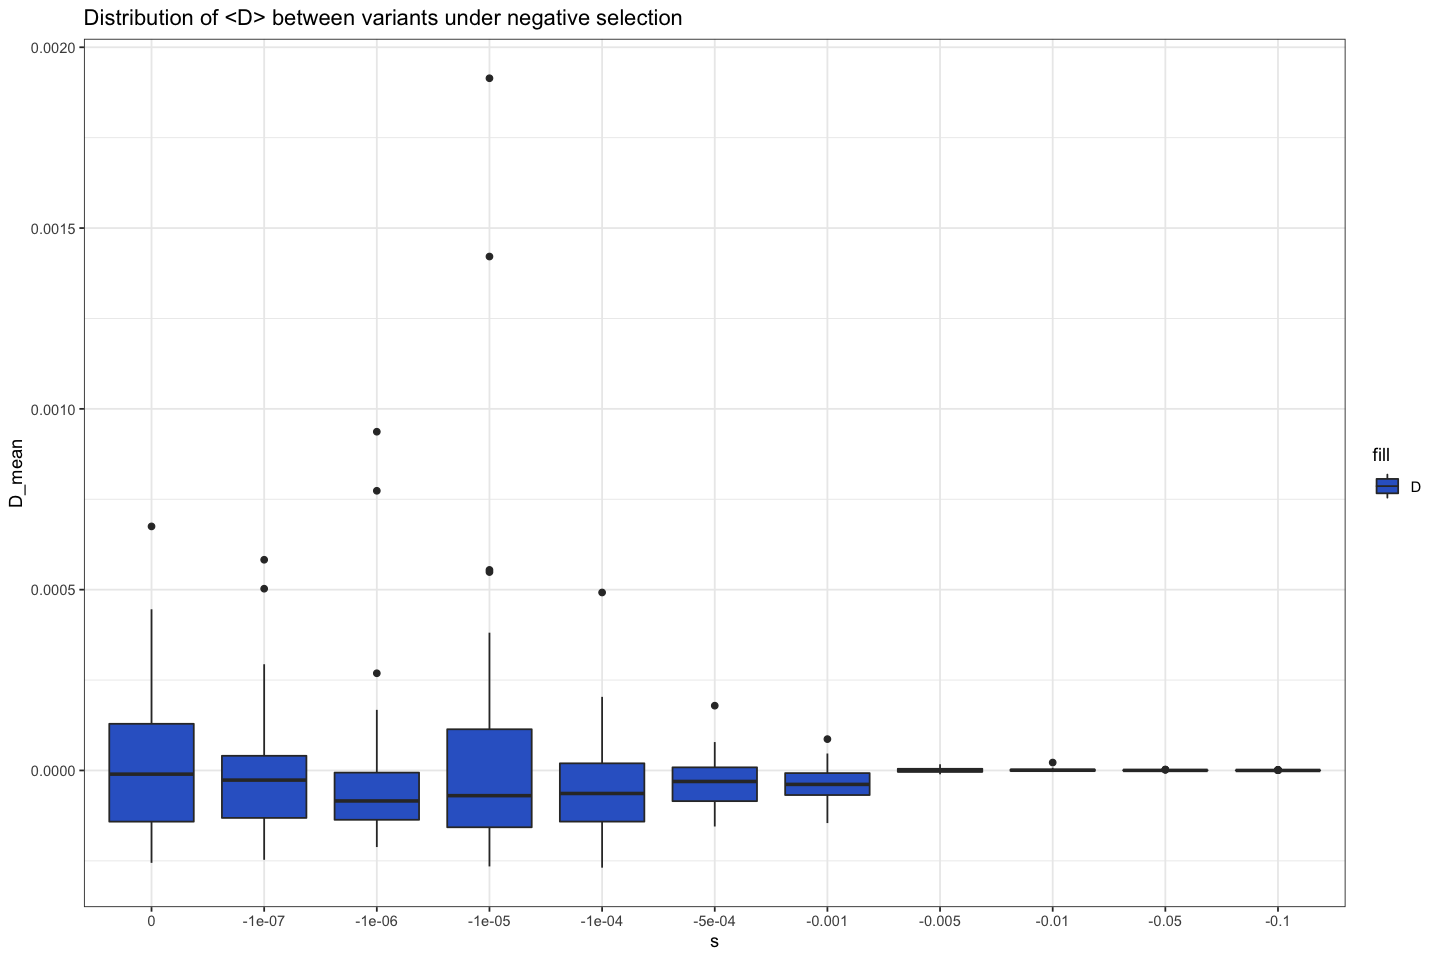

In [54]:
p <- ggplot(dat, aes(x=s, y=D_mean)) + theme_bw() + scale_fill_gdocs()
p <- p + geom_boxplot(aes(fill='D'))
p <- p + ggtitle('Distribution of <D> between variants under negative selection')
p

## R5

with recombination

Run the simulation

```bash
pwd
# /Users/cchiang/research/sunyaev/projects/epi/expts/model_calibration_2021-02-03/r5

for SELECTION in 0 -1e-7 -1e-6 -1e-5 -1e-4 -1e-3 -1e-2
do
    echo "Selection: $SELECTION"
    for i in {1..50}
    do
        OUTPREFIX=s${SELECTION}_i${i}
        time ./model_cal.sh -N 5000 -g 20000 -c 100000 -s ${SELECTION} -u 1e-8 -r 1e-8 -o ${OUTPREFIX}
        cat ${OUTPREFIX}.vcf | vawk --header '{ $3=I$MID ; print }' | bgzip -c > ${OUTPREFIX}.vcf.gz &&
        rm ${OUTPREFIX}.vcf
        tabix -p vcf ${OUTPREFIX}.vcf.gz;

        emeraLD --in ${OUTPREFIX}.vcf.gz --stdout --phased --extra --dstats | gzip -c > ${OUTPREFIX}.ld.txt.gz
    done
done
 ```

Compile summary statistics

```bash
for SELECTION in 0 -1e-7 -1e-6 -1e-5 -1e-4 -1e-3 -1e-2
do
    for i in {1..50}
    do
        OUTPREFIX=s${SELECTION}_i${i}

        if [ -f "${OUTPREFIX}.ld.txt.gz" ]
        then
            zcat ${OUTPREFIX}.ld.txt.gz | grep -v "^#" | cut -f 10 | zstats > stats.txt
            NLINES=`cat stats.txt | grep "num lines" | awk '{ print $NF}'`
            MEAN=`cat stats.txt | grep arith | awk '{ print $NF}'`
            STDEV=`cat stats.txt | grep stdev | awk '{ print $NF}'`
            echo -e "${SELECTION}\t${i}\t${NLINES}\t${MEAN}\t${STDEV}"
        fi
    done
done > summary_stats.txt
```

### R session

In [65]:
setwd('/Users/cchiang/research/sunyaev/projects/epi/expts/model_calibration_2021-02-03/r5')

In [66]:
library('ggplot2')
library('ggthemes')
options(repr.plot.width=12, repr.plot.height=8)

In [67]:
dat <- read.table('summary_stats.txt', col.names=c('s', 'run', 'num_variants', 'D_mean', 'D_stdev'))
dat$s <- as.factor(dat$s)
dat$s <- factor(dat$s, levels=rev(levels(dat$s)))

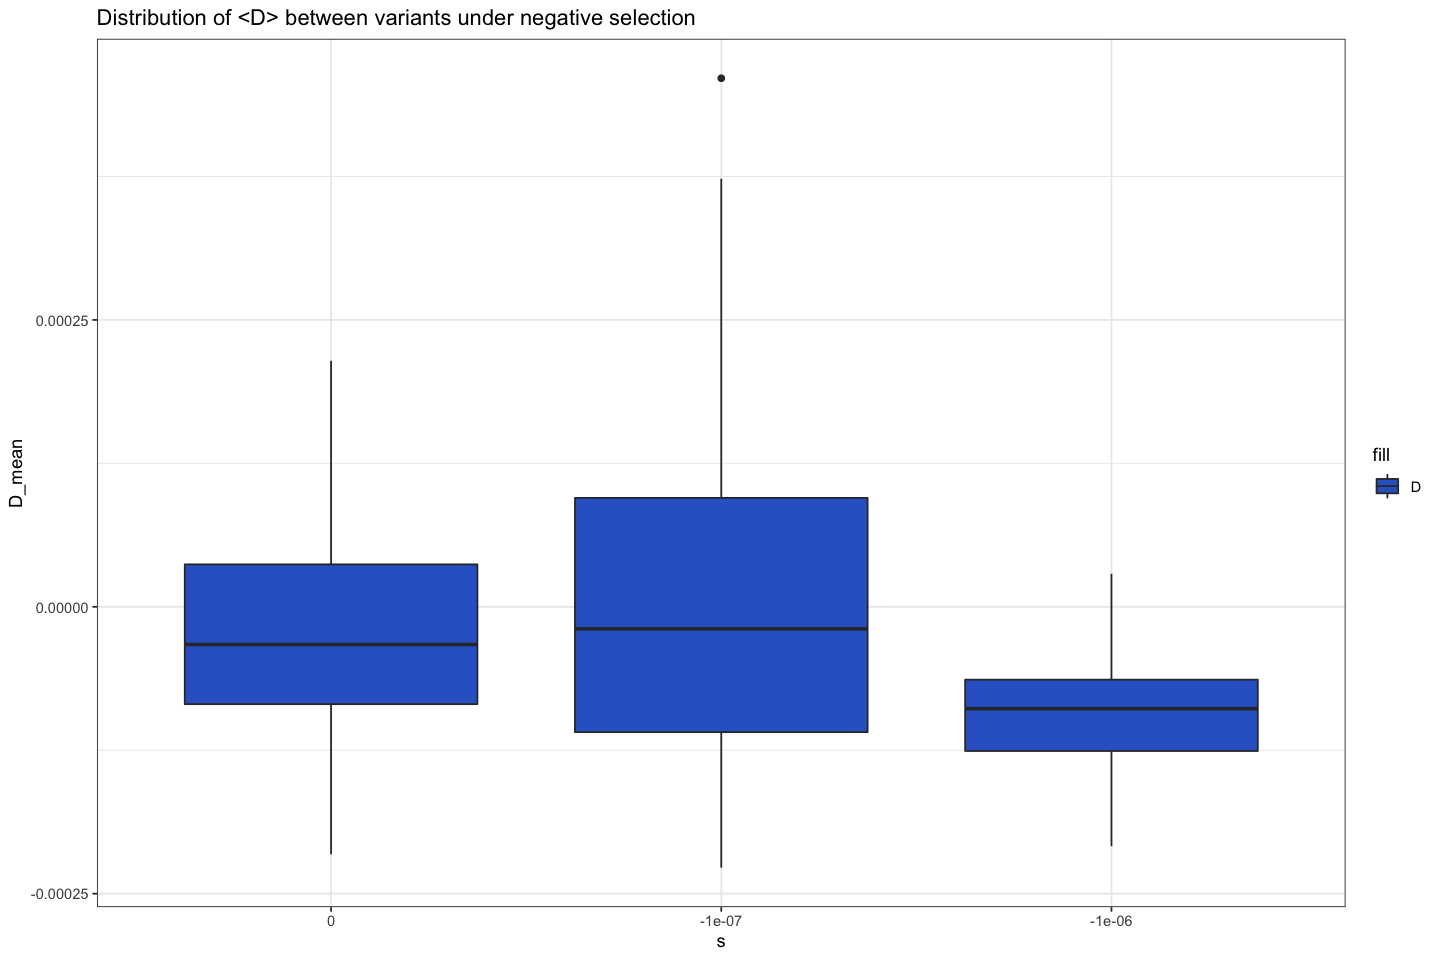

In [68]:
p <- ggplot(dat, aes(x=s, y=D_mean)) + theme_bw() + scale_fill_gdocs()
p <- p + geom_boxplot(aes(fill='D'))
p <- p + ggtitle('Distribution of <D> between variants under negative selection')
p